🔴PROBLEM STATEMENT

1.Calculate the percentage of female passengers who survived using Titanic_train dataset.

2.Calculate the percentage of male passengers who survived using Titanic_test dataset.

🔴Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

🔴Importing the required data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_train=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Titanic_train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Titanic_test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
Survived_Count = df_train['Survived'].value_counts(normalize=True)
print(Survived_Count)

0    0.616162
1    0.383838
Name: Survived, dtype: float64


<Axes: ylabel='Survived'>

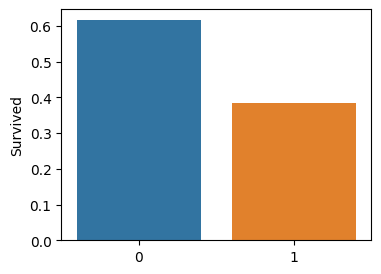

In [6]:
plt.figure(figsize=(4,3))
sns.barplot(x=Survived_Count.index, y=Survived_Count)

🔴Calculating the percentage of female passengers who survived in Titanic_train data.

In [7]:
Survived_FP = df_train.loc[df_train.Sex =='female']['Survived']
Rate_FP = sum(Survived_FP)/len(Survived_FP)
print("The Percentage of Female Passengers Survived:",Rate_FP)

The Percentage of Female Passengers Survived: 0.7420382165605095


🔴Calculating the percentage of male passengers who survived in Titanic_train data.

In [8]:
Survived_MP = df_train.loc[df_train.Sex == 'male']['Survived']
Rate_MP = sum(Survived_MP)/len(Survived_MP)
print("The Percentage of Male Passengers Survived:",Rate_MP)

The Percentage of Male Passengers Survived: 0.18890814558058924


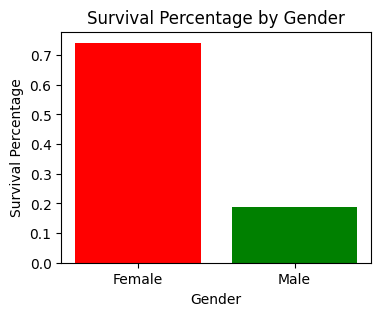

In [10]:
Categories = ['Female','Male']
Percentage = [Rate_FP, Rate_MP]
plt.figure(figsize=(4,3))
plt.bar(Categories,Percentage, color=['Red','Green'])
plt.title('Survival Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Percentage')
plt.show()

From above Graph Observation, Almost 75% of the women on board survived, whereas only 19% of the men survived.

🔴RANDOM FOREST CLASSIFIER

A random forest is a supervised algorithm that uses an ensemble learning method consisting of a multitude of decision trees, the output of which is the consensus of the best answer to the problem. Random Forest can be used for classification or regression.

In [11]:
from sklearn.ensemble import RandomForestClassifier
y = df_train['Survived']
features = ['Pclass','Sex','SibSp','Parch']
x_train = pd.get_dummies(df_train[features])
x_test = pd.get_dummies(df_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x_train,y)
prediction = model.predict(x_test)
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived':prediction})
output.to_csv('submission.csv',index=False)
print('Successfully Saved')

Successfully Saved
